In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Merged HMO File

In [2]:
# Adjust path as needed
df = pd.read_csv("../staging/_merged/hmo_merged.csv")

df.head()
df.shape

(577, 70)

In [ ]:
df["Secretor"] = pd.to_numeric(df["Secretor"], errors="coerce")


In [9]:
df["Secretor"].unique()
df["Secretor"].dtype

dtype('float64')

In [ ]:
df["Secretor"] = df["Secretor"].astype("Int64")

In [11]:
df.Secretor.value_counts()

Secretor
1    407
0    165
Name: count, dtype: Int64

In [12]:
# identify the nmol and pct columns

nmol_cols = [c for c in df.columns if "(nmol/mL)" in c]
pct_cols = [c for c in df.columns if "(%)" in c and "SUM" not in c]

nmol_cols, pct_cols

(['2FL (nmol/mL)',
  '3FL (nmol/mL)',
  'DFLac (nmol/mL)',
  '3SL (nmol/mL)',
  '6SL (nmol/mL)',
  'LNT (nmol/mL)',
  'LNnT (nmol/mL)',
  'LNFP I (nmol/mL)',
  'LNFP II (nmol/mL)',
  'LNFP III (nmol/mL)',
  'LSTb (nmol/mL)',
  'LSTc (nmol/mL)',
  'DFLNT (nmol/mL)',
  'LNH (nmol/mL)',
  'DSLNT (nmol/mL)',
  'FLNH (nmol/mL)',
  'DFLNH (nmol/mL)',
  'FDSLNH (nmol/mL)',
  'DSLNH (nmol/mL)',
  'SUM (nmol/mL)',
  'Sia (nmol/mL)',
  'Fuc (nmol/mL)'],
 ['2FL (%)',
  '3FL (%)',
  'DFLac (%)',
  '3SL (%)',
  '6SL (%)',
  'LNT (%)',
  'LNnT (%)',
  'LNFP I (%)',
  'LNFP II (%)',
  'LNFP III (%)',
  'LSTb (%)',
  'LSTc (%)',
  'DFLNT (%)',
  'LNH (%)',
  'DSLNT (%)',
  'FLNH (%)',
  'DFLNH (%)',
  'FDSLNH (%)',
  'DSLNH (%)'])

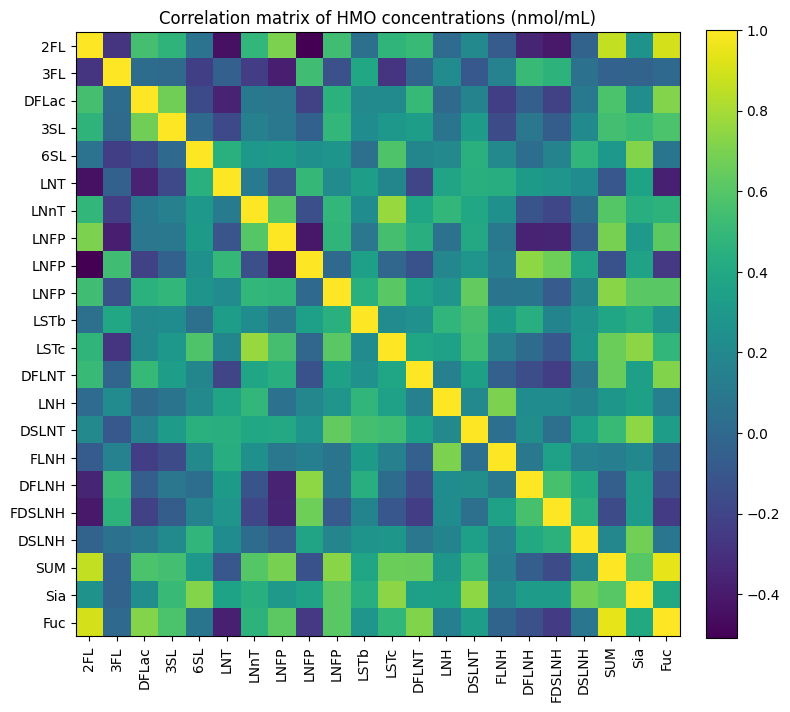

In [16]:
corr = df[nmol_cols].corr(method="pearson")

plt.figure(figsize=(8, 8))
im = plt.imshow(corr.values, interpolation="nearest")
plt.colorbar(im, fraction=0.046, pad=0.04)

plt.xticks(range(len(nmol_cols)), [c.split()[0] for c in nmol_cols], rotation=90)
plt.yticks(range(len(nmol_cols)), [c.split()[0] for c in nmol_cols])
plt.title("Correlation matrix of HMO concentrations (nmol/mL)")

plt.tight_layout()
plt.show()


In [18]:
# You can adjust these based on your domain knowledge
sialylated = [
    "3SL (%)",
    "6SL (%)",
    "LSTb (%)",
    "LSTc (%)",
    "DSLNT (%)",
    "FDSLNH (%)",
    "DSLNH (%)",
]

fucosylated = [
    "2FL (%)",
    "3FL (%)",
    "DFLac (%)",
    "LNFP I (%)",
    "LNFP II (%)",
    "LNFP III (%)",
    "DFLNT (%)",
    "FLNH (%)",
    "DFLNH (%)",
]

neutral = [c for c in pct_cols if c not in sialylated + fucosylated]

# Per-sample class percentages
df["Pct_sialylated"] = df[sialylated].sum(axis=1)
df["Pct_fucosylated"] = df[fucosylated].sum(axis=1)
df["Pct_neutral"] = df[neutral].sum(axis=1)

# Aggregate by study to make the plot readable
comp_by_study = df.groupby("StudyID")[["Pct_fucosylated", "Pct_sialylated", "Pct_neutral"]].mean()

comp_by_study



,Pct_fucosylated,Pct_sialylated,Pct_neutral
StudyID,,,
Brooklyn,76.545177,11.044944,12.409879
NeoBANK,60.280383,21.382755,17.596122
Oxford,69.153155,14.987127,15.218692


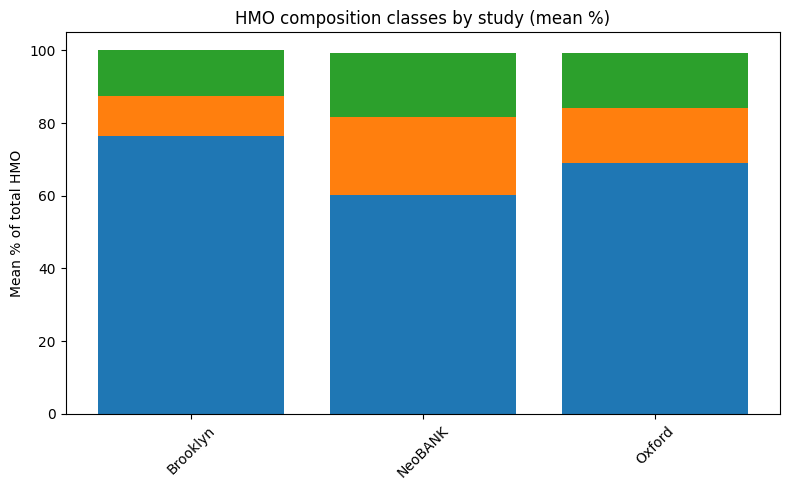

In [19]:
studies = comp_by_study.index.tolist()
x = np.arange(len(studies))

fuc = comp_by_study["Pct_fucosylated"].values
sia = comp_by_study["Pct_sialylated"].values
neu = comp_by_study["Pct_neutral"].values

plt.figure(figsize=(8, 5))

plt.bar(x, fuc)
plt.bar(x, sia, bottom=fuc)
plt.bar(x, neu, bottom=fuc+sia)

plt.xticks(x, studies, rotation=45)
plt.ylabel("Mean % of total HMO")
plt.title("HMO composition classes by study (mean %)")

plt.tight_layout()
plt.show()
